In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [3]:
# read csv input file
input_data = pd.read_csv("samples100.csv").iloc[: , 1:].T
input_data = input_data.values

In [4]:
# process given dimensionality reduction and clustering scheme
# for plot, defaults to TSNE if reduction scheme does not reduce to 2-D
def process_methods(in_data, dim_red, cluster, fn):
    reduced = dim_red.fit_transform(in_data)
    cluster.fit(reduced)
    f = open(fn + "_dimreddata.csv", "w")
    f.write("\n".join([",".join([str(x) for x in r]) for r in reduced]))
    
    (_, d) = reduced.shape
    if d > 2: 
        if d <= 50: reduced = TSNE().fit_transform(in_data)
        else: reduced = TSNE().fit_transform(TruncatedSVD(n_components = 50).fit_transform(reduced))
            
    plt.scatter(reduced.T[0], reduced.T[1], c = cluster.labels_)
    plt.savefig(fn + "_plot.png")
    
    f = open(fn + "_centroids.csv", "w")
    f.write("\n".join([",".join([str(x) for x in r]) for r in cluster.cluster_centers_]))
    f = open(fn + "_clusterlabels.csv", "w")
    f.write("\n".join([str(x) for x in cluster.labels_]))
    

In [5]:
svd50 = TruncatedSVD(n_components = 50)
svd2 = TruncatedSVD(n_components = 2)
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2) # features must be reduced to reasonable number (~50) before using TSNE

kmeans = KMeans(n_clusters = 10)

In [6]:
data_svd50 = svd50.fit_transform(input_data)

In [7]:
methods_list = [(data_svd50, tsne, kmeans, "tsne,kmeans"),
                (input_data, svd2, kmeans, "svd,kmeans"),
                (input_data, pca, kmeans, "pca,kmeans")]

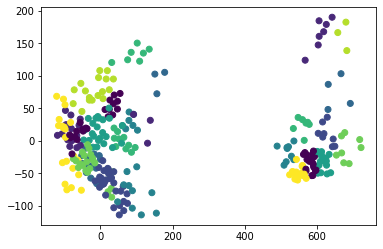

In [8]:
for (d, r, c, f) in methods_list:
    process_methods(d, r, c, f)